<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task2/Task2__Logistics_model_CitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

In [10]:
# Load data
file_path = '/content/drive/MyDrive/Dataset/CitarumWater.csv'
Dataset = pd.read_csv(file_path)

In [11]:
Dataset.head(10)

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.0430,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.0110,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.2300,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.0570,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.1100,-,2.44,2
5,6,Citarum,Bendung Walahar,18/04/2018,7.34,25.55°C,17.0,6.48,2.89,6.86,1.29,11000.0,0.0990,-,4.45,2
6,7,Citarum,Tunggak Jati,18/04/2018,7.41,25.55°C,18.0,5.10,3.38,10.80,0.96,160000.0,0.5100,-,8.64,3
7,8,Citarum,Wangisagara,30/05/2018,7.54,25.55°C,9.0,6.33,3.61,10.30,2.47,22000.0,0.0043,-,5.53,3
8,9,Citarum,Koyod,30/05/2018,7.64,25.55°C,13.0,2.18,9.15,26.80,2.90,170000.0,0.0043,-,8.74,3
9,10,Citarum,Setelah IPAL Cisirung,30/05/2018,7.82,25.55°C,27.0,1.45,12.00,45.70,3.05,280000.0,0.0830,-,9.55,3


In [12]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB


In [14]:
# Menghapus simbol '°C' pada kolom 'Temp' dan ubah ke tipe numerik
Dataset['Temp'] = Dataset['Temp'].str.replace('°C', '').astype(float)

In [15]:
# Memilih fitur termasuk 'Temp' dan target
X = data[['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat']]
y = data['Class']

In [16]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Melatih model regresi logistik
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
# Memprediksi data uji
y_pred = model.predict(X_test)

In [19]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

In [20]:
# Menampilkan ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=2)

In [22]:
# Menampilkan laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

In [23]:
# Menampilkan hasil metrik evaluasi
print(f"Akurasi: {accuracy}")
print(f"Presisi: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("\nLaporan Klasifikasi:\n", classification_rep)

Akurasi: 0.9466666666666667
Presisi: 0.923499061913696
Recall: 0.8723887217465093
F1-Score: 0.8826501020786934
ROC AUC: 0.9917507209333964

Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.94      0.93      0.93       290
           2       0.95      0.96      0.96       447
           3       0.80      1.00      0.89         8
           4       1.00      0.60      0.75         5

    accuracy                           0.95       750
   macro avg       0.92      0.87      0.88       750
weighted avg       0.95      0.95      0.95       750



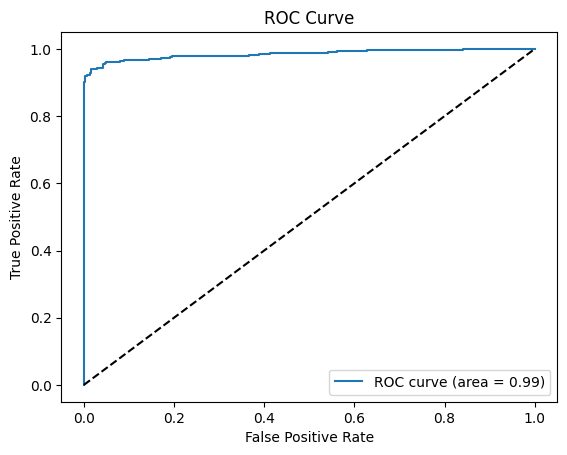

In [21]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()